In [74]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns; sns.set_theme()
import pandas as pd
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import FormatStrFormatter
plt.style.use('default')
from itertools import groupby

In [75]:
mill = np.load("/home/lars/vmodel_output/longsim_data/histrun_mill_histrun_.npy")
steps = 10
reps = 40
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)



mill_full = abs(mill[:,:,1:])
times = len(mill_full[0,0,:])

mill_full[mill_full<0.4] = 0
mill_full[mill_full>=0.4] = 1

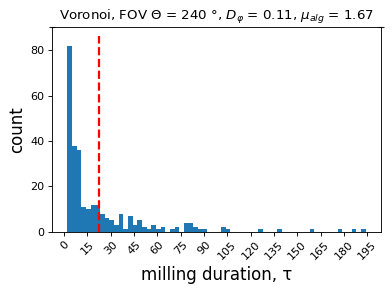

In [95]:
millevents_1 = []
astr = 5
dphi = 1
mill_abs = mill_full[0]

w = 3
w2 = 15
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
#fig, (#ax1, ax2) = plt.subplots(1, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 3.75), dpi=80)
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

##ax1.set_ylim(180, 185)  # outliers only
##ax2.set_ylim(0, 155)  # most of the data

##ax1.tick_params(bottom = False) 
##ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

##plt.setp(#ax1.get_xticklabels(), visible=False)
##ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
##ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
##ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)

ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
##ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")

plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Voronoi, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_240_middle_vor.pdf",bbox_inches="tight")

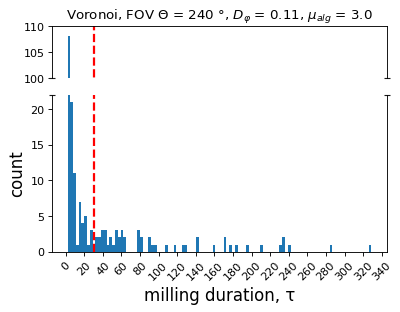

In [96]:


mill_abs = mill_full[1]


millevents_1 = []
astr = 9
dphi = 1


w = 3
w2 = 20
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, dpi = 80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

ax1.set_ylim(100,110)  # outliers only
ax2.set_ylim(0, 22)  # most of the data

ax1.tick_params(bottom = False) 
ax1.spines.bottom.set_visible(False)

ax2.spines.top.set_visible(False)

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax1.set_title("Voronoi, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_240_top_vor.pdf",bbox_inches="tight")

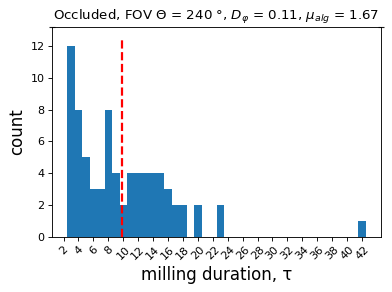

In [97]:

mill_abs = mill_full[2]


millevents_1 = []
astr = 5
dphi = 1


w = 1
w2 = 2
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(48,53)  # outliers only
#ax2.set_ylim(0, 15)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")

plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Occluded, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_240_middle_occ.pdf",bbox_inches="tight")

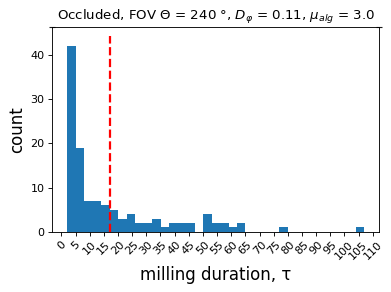

In [98]:
mill_abs = mill_full[3]


millevents_1 = []
astr = 9
dphi = 1


w = 3
w2 = 5
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(95, 105)  # outliers only
#ax2.set_ylim(0, 30)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)

ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Occluded, FOV Θ = 240 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_240_top_occ.pdf",bbox_inches="tight")

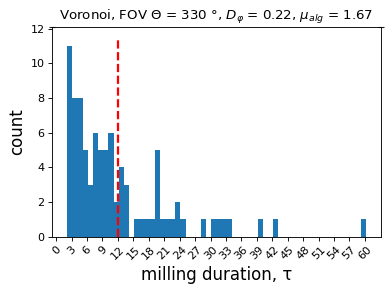

In [99]:
mill_abs = mill_full[4]


millevents_1 = []
astr = 5
dphi = 2


w = 1
w2 =3
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(43, 48)  # outliers only
#ax2.set_ylim(0, 22)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Voronoi, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_330_middle_vor.pdf",bbox_inches="tight")

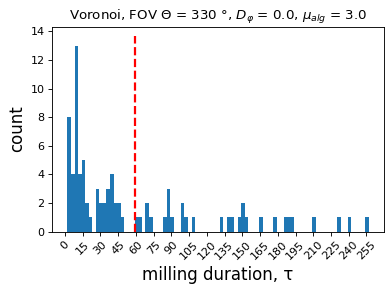

In [100]:
mill_abs = mill_full[5]


millevents_1 = []
astr = 9
dphi = 0


w = 3
w2 = 15
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))
            
            
pts = millevents_1
#fig, (#ax1, ax2) = plt.subplots(1, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
#fig.subplots_adjust(hspace=0.1)  # adjust space between axes

##ax1.set_ylim(22, 26)  # outliers only
##ax2.set_ylim(0, 15)  # most of the data

##ax1.tick_params(bottom = False) 
##ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

##plt.setp(#ax1.get_xticklabels(), visible=False)
##ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#ax2.xaxis.tick_bottom()
fig, ax2 = plt.subplots(1, 1, figsize=(5, 3.75), dpi=80)

d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)         
            
            
plt.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
##ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
#ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_330_top_vor.pdf",bbox_inches="tight")

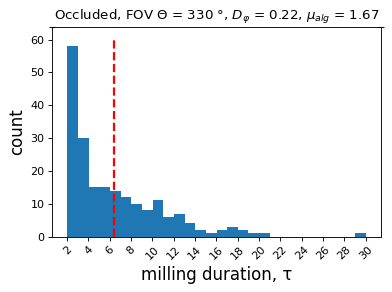

In [101]:
mill_abs = mill_full[6]


millevents_1 = []
astr = 5
dphi = 2


w = 1
w2 = 2
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(260, 265)  # outliers only
#ax2.set_ylim(0,90)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Occluded, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_330_middle_occ.pdf",bbox_inches="tight")

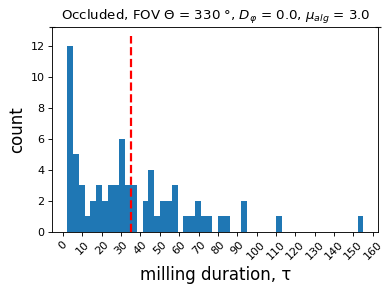

In [103]:
mill_abs = mill_full[7]


millevents_1 = []
astr = 9
dphi = 0


w = 3
w2 = 10
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))
pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(20, 30)  # outliers only
#ax2.set_ylim(0,10)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Occluded, FOV Θ = 330 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_330_top_occ.pdf",bbox_inches="tight")

In [84]:
############################
# 360
############################

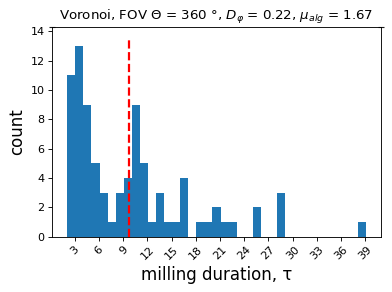

In [104]:
#mill_abs = mill_full[4]


millevents_1 = []
astr = 5
dphi = 2

mill_abs = abs(np.load("/home/lars/vmodel_output/longsim_data/hm_millstart_fov360_vor_mill_v2_astr_dphi.npy"))[astr, dphi,:,:]


mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1
w = 1
w2 =3
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(43, 48)  # outliers only
#ax2.set_ylim(0, 22)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Voronoi, FOV Θ = 360 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_360_middle_vor.pdf",bbox_inches="tight")

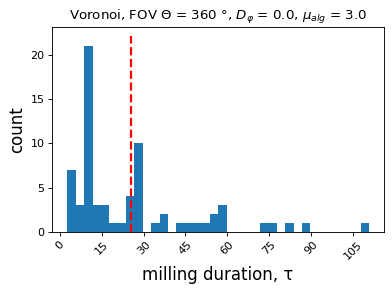

In [105]:
mill_abs = mill_full[5]


millevents_1 = []
astr = 9
dphi = 0
mill_abs = abs(np.load("/home/lars/vmodel_output/longsim_data/hm_millstart_fov360_vor_mill_v2_astr_dphi.npy"))[astr, dphi,:,:]


mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

w = 3
w2 = 15
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))
            
            
pts = millevents_1
#fig, (#ax1, ax2) = plt.subplots(1, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
#fig.subplots_adjust(hspace=0.1)  # adjust space between axes

##ax1.set_ylim(22, 26)  # outliers only
##ax2.set_ylim(0, 15)  # most of the data

##ax1.tick_params(bottom = False) 
##ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

##plt.setp(#ax1.get_xticklabels(), visible=False)
##ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#ax2.xaxis.tick_bottom()
fig, ax2 = plt.subplots(1, 1, figsize=(5, 3.75), dpi=80)

d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)         
            
            
plt.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
##ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
#ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 360 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_360_top_vor.pdf",bbox_inches="tight")

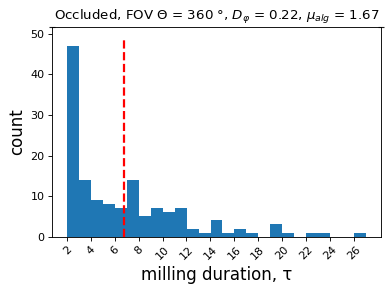

In [106]:
mill_abs = mill_full[6]


millevents_1 = []
astr = 5
dphi = 2

mill_abs = abs(np.load("/home/lars/vmodel_output/longsim_data/hm_millstart_fov360_occ_mill_v2_astr_dphi.npy"))[astr, dphi,:,:]


mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1
w = 1
w2 = 2
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))

pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(260, 265)  # outliers only
#ax2.set_ylim(0,90)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Occluded, FOV Θ = 360 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_360_middle_occ.pdf",bbox_inches="tight")

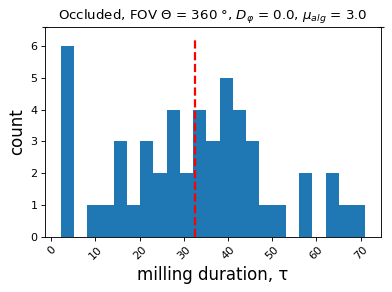

In [107]:
mill_abs = mill_full[7]


millevents_1 = []
astr = 9
dphi = 0
mill_abs = abs(np.load("/home/lars/vmodel_output/longsim_data/hm_millstart_fov360_occ_mill_v2_astr_dphi.npy"))[astr, dphi,:,:]


mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

w = 3
w2 = 10
for i in range(40):
    lst = mill_abs[i,:]
    grpby = groupby(lst)
    
    for k, g in groupby(lst):
        g = list(g)
        if k == 1.0 and len(g) > 100:
            millevents_1.append(0.02*len(g))
pts = millevents_1
fig, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(5, 3.75), dpi=80)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

#ax1.set_ylim(20, 30)  # outliers only
#ax2.set_ylim(0,10)  # most of the data

#ax1.tick_params(bottom = False) 
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)

#plt.setp(#ax1.get_xticklabels(), visible=False)
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = 0# proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
ax2.hist(millevents_1, bins=np.arange(min(millevents_1), max(millevents_1) + w, w))
#ax1.plot([0, 1], [0, 0], transform=#ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.xticks(np.arange(0, round(max(millevents_1)+w2), w2), rotation = 45)
ax2.vlines(x=np.mean(millevents_1), ymin = 0, ymax = ax2.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
#ax1.vlines(x=np.mean(millevents_1), ymin = 0, ymax = #ax1.get_ylim()[1], linewidth=2, color='red', linestyles = "--")
plt.xlabel("milling duration, τ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("count", fontsize = 15) # y-axis label with fontsize 15
ax2.set_title("Occluded, FOV Θ = 360 °, $D_{φ}$ = "+str(round(paraChange2_val[dphi], 2))+", $μ_{alg}$ = "+str(round(paraChange1_val[astr], 2)))
plt.tight_layout()
fig.set_size_inches(5,3.75)
plt.savefig("hist_alongCrit_millstart_360_top_occ.pdf",bbox_inches="tight")